# Linear Regression:

This is the first model tested for Used Car Price Prediction

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pickle

Different brands and models were concatenated to one dataframe

In [2]:
# Read and concatenate all CSV's

path = 'https://bucketmarialara.s3.us-east-2.amazonaws.com/' # use your s3 bucket path ( the common path where you uploaded all csv files
li = []
brands = ["Audi","BMW","Ford","Hyundi","Mercedes Benz","Skoda","Toyota","Volkswagen"]
csv_names = ["audi", "bmw", "ford", "hyundi", "merc", "skoda","toyota", "vw"]
for i in range(0,8):
    filename = path + csv_names[i] + ".csv"
    print(filename)
    frame = pd.read_csv(filename, index_col=None, header=0)
    frame["make"] = brands[i]
    li.append(frame)
frame = pd.concat(li, axis=0, ignore_index=True)
frame


https://bucketmarialara.s3.us-east-2.amazonaws.com/audi.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/bmw.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/ford.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/hyundi.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/merc.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/skoda.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/toyota.csv
https://bucketmarialara.s3.us-east-2.amazonaws.com/vw.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
85551,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
85552,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
85553,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [3]:
frame["model"]= frame["model"].str.lstrip()
frame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
85551,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
85552,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
85553,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [4]:
frame.to_csv("test.csv")

In [5]:
frame_filtered = frame.loc[frame['year'] != 2060]
frame_filtered

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
85551,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
85552,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
85553,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [6]:
# identified outliers
index_list = [9434,10109,7221,7845,17753,14988,14306,33361,22488,43661,44279,62386]
#outliers
Filter_df  = frame_filtered[frame_filtered.index.isin(index_list)]
Filter_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
7221,A5,2020,59995,Semi-Auto,2000,Diesel,150,40.9,3.0,Audi
7845,A6,2018,59950,Automatic,22000,Petrol,145,29.4,4.0,Audi
9434,A8,2020,78990,Automatic,250,Diesel,145,39.2,3.0,Audi
10109,S3,2003,4990,Manual,106000,Petrol,325,39.8,1.8,Audi
14306,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0,BMW
14988,5 Series,2020,54845,Semi-Auto,450,Diesel,145,60.1,3.0,BMW
17753,3 Series,2020,71990,Semi-Auto,150,Diesel,150,47.1,3.0,BMW
22488,Focus,2017,38015,Manual,197,Diesel,145,74.3,1.5,Ford
33361,Focus,2018,54995,Manual,11000,Petrol,145,36.7,2.3,Ford
43661,I10,2017,92000,Automatic,35460,Petrol,150,47.9,1.2,Hyundi


In [7]:
#remove outliers
frame_filtered = frame_filtered.drop(index_list)

In [8]:
frame_filtered.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
make            0
dtype: int64

In [9]:
frame_filtered

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
85551,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
85552,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
85553,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


# Pipeline

Categorical and Numeric Features were preprocessed separately

In [10]:
# define numeric features
num_features = ['year','mileage',
                    'tax','mpg',
                    'engineSize']

# Pipeline steps to transform numeric features
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),('poly',PolynomialFeatures(degree = 3)),
                                      ('scaler', StandardScaler())])

In [11]:
# define categorical features
cat_features = ['model','transmission','fuelType','make']

# Pipeline to transform (encode) categorical features
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [12]:
# Use "ColumnTransformer" to join both categorical and numeric pipelines

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [13]:
# Create a pipeline that execute "preprocessor" and the LinearRegression model

regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Training & Evaluating 

In [14]:
# Define X, y

X = frame_filtered.drop('price', axis = 1)
y = frame_filtered['price']

# Split X,y into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                           

In [15]:
X_train[:1]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make
53164,C Class,2017,Semi-Auto,30577,Diesel,30,64.2,2.1,Mercedes Benz


In [16]:
# Evaluate the model for train data
regression.score(X_train, y_train)

0.9210450692730925

In [17]:
# Evaluate the model for test data
regression.score(X_test, y_test)

0.9174172110304226

# Residual Plot

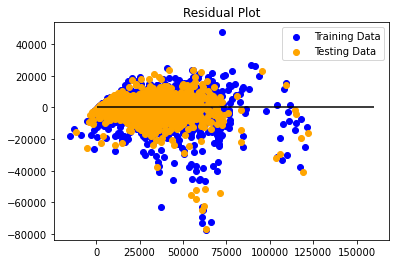

In [18]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
predictions = regression.predict(X_test)
plt.scatter(regression.predict(X_train), regression.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regression.predict(X_test), regression.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [19]:
X_test[:10]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make
82755,Up,2013,Manual,34515,Petrol,20,60.1,1.0,Volkswagen
43902,I30,2009,Manual,116000,Diesel,30,60.1,1.6,Hyundi
35487,Fiesta,2018,Manual,15000,Petrol,145,62.8,1.0,Ford
59656,Fabia,2019,Semi-Auto,13617,Petrol,150,60.1,1.0,Skoda
61417,Fabia,2019,Manual,5000,Petrol,145,52.3,1.0,Skoda
82267,Sharan,2018,Semi-Auto,6196,Diesel,145,41.5,2.0,Volkswagen
22504,Tourneo Custom,2016,Manual,22704,Diesel,200,44.8,2.0,Ford
32070,Kuga,2019,Manual,13522,Diesel,145,47.9,2.0,Ford
56910,C Class,2016,Automatic,23000,Diesel,30,64.2,2.1,Mercedes Benz
35472,Fiesta,2015,Manual,69000,Petrol,145,47.9,1.6,Ford


In [20]:
y_test[:10]

82755     5395
43902     2250
35487    10490
59656    13495
61417    13990
82267    23485
22504    16700
32070    19470
56910    20990
35472     7490
Name: price, dtype: int64

# Predictions

In [21]:
# predictions with test data
encoded_prediction= regression.predict(X_test[:10])
# Actual data
actual = list(y_test[:10])

print(f"Predicted classes: {encoded_prediction}")
print(f"Actual Labels: {actual}")

Predicted classes: [ 3486.61965979  4678.32838035 11362.23965293 13474.09040475
 12527.82617322 24934.71934137 15586.49579918 21496.23287271
 19823.85214841  5787.86545285]
Actual Labels: [5395, 2250, 10490, 13495, 13990, 23485, 16700, 19470, 20990, 7490]


In [22]:
pkl_filename = "LinearRegression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regression, file)